# Artificial Intelligence
## UEMH3073 / UECS2053 / UECS2153

# Lab 2: Genetic Algorithm

This notebook is an assignment requiring you to investigate the Travelling Salesman Problem. Guidance is provided so you can understand what needs to be done for this assignment as you follow through this lab. Convenience classes and functions/ methods are provided.

You will encounter #TODO in the code cells explaining tasks you need to complete. In other words, you will need to write codes and accomplish the #TODO tasks so that the genetic algorithm functions well and runs correctly. Look for "Replacement starts here" and "Replacement ends here" to know the parts of the codes requiring your inputs.
    

The #TODO tasks and their marks distribution are as follows:

a. #TODO1 (10 marks) in the Population Initialization function. You will read a set of cities from the filename when creating an initial population.

b. #TODO2 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Tournament Selection.

c. #TODO3 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Proportional Selection.

d. #TODO4 (10 marks) in the Survival Selection function. You will replace the dummy survival selection function with Merge, Sort & Truncate.
    
e. #TODO5 (10 marks) in the Crossover function. You will replace the dummy crossover function the Partially Mapped Crossover approach.

f. #TODO6 (10 marks) in the Mutation function. You will replace the dummy mutation function with Insertion Mutation approach.

g. #TODO7 (10 marks) in Performance Evaluation. You will present performance evaluation for the different Parent Selection functions.

Marks are also given for: Report Presentation and Formatting (15%) and Code Quality and Comments (15%). More details about this notebook and assignment are provided in your lab sheet.

## An Overview of the Travelling Salesman Problem

In the travelling salesman problem, a salesperson wish to find the shortest path that passes through all cities s/he wishes to visit given the coordinates of a set of cities. The salesperson should visit each of the cities once only, and so:

a. Each path consists all cities in the set.

b. Each path visits each of the cities once only. So, none of the cities are visited more than once.

## Imports

In [1]:
%matplotlib inline

# Please add more imports if you need them

import random
import time
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint as print

## Convenience Classes

### City

The City class, which represents a city, possesses the properties of the city and has functions/ methods used for calculating the distance between the city and another city. Each path, represented by a chromosome, is formed by a set of cities.   

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

### Fitness

The Fitness class, which represents the fitness function, possesses the properties of a path and has functions/methods used for calculating the fitness value of the path, which is based on the distance of the path.

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = None
        self.fitness = None

    def routeDistance(self):
        if self.distance == None:
            pathDistance = 0.0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i+1 < len(self.route):
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance

    def routeFitness(self):
        if self.fitness == None:
        # Fitness function (Simple division) that uses a simple
        # division that divides one by the distance of the path
            self.fitness = 1 / float(self.routeDistance())
            # Note: You must ensure a division by zero does not occur
        return self.fitness


## Population Initialization  

The population initialization function (or method) performs random initialization. This creates an initial population with completely random chromosomes (or solutions). There are three functions related to population initialization.

The first function is genCityList() which generates a set of cities from a file.  

In [ ]:
def genCityList(filename):
    cityList = []

    # TODO 1 (10 marks) - Replace the following codes that generate 10 random cities.
    # Your new implementation must read a set of cities from the filename to be used for creating
    # an initial population.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors with slight effects on the fitness value.
    # >0 to <5 marks: Major errors with significant effects on the fitness value.
    # 0 marks:        No answer is given.

    # Replacement starts here
    with open(filename, 'r') as file:
            next(file)  # Skip header line
            for line in file:
                parts = line.strip().split(',')
                # read the coordinates
                x = float(parts[1])
                y = float(parts[2])
                # append into cityList
                cityList.append(City(x, y))
    # Replacement ends here

    return cityList



The second function is createRoute() which generates a random route (chromosome) from a set of City instances.

In [5]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

The third function is initialPopulation() which calls the second function repeatedly to create an initial population (a list of routes).

In [6]:
def initialPopulation(popSize, cityList):
    population = []
    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code.

Sample run 1 initializes 10 cities in cityList as follows:

cityList = genCityList('cities10.txt')
print(cityList)

Sample run 2 initializes 10 cities in cityList and creates a population with three routes as follows:

cityList = genCityList('cities10.txt')
population = initialPopulation(3, cityList)
print(population)

## Selection

Parents selection selects chromosomes with high fitness values from a population. Survivor selection selects chromosomes with higher fitness values to form the population of the next generation. The population size is len(population), so we have len(population) in this population.

### Parent Selection

There are three implementations for parent selection. The first parentSelection() performs random selection.

In [7]:
def parentSelection(population, poolSize=None):
    if poolSize == None:
        poolSize = len(population)

    matingPool = []

    for i in range(0, poolSize):
        fitness = Fitness(population[i]).routeFitness()
        matingPool.append(random.choice(population))

    return matingPool

The second parentSelection() performs Tournament Selection.

In [8]:
def parentSelection(population, poolSize=None):

    # TODO 2 (10 marks) - Replace the dummy parent selection function below with
    # Tournament Selection.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    # You will need to compare the performance achieved by Random Selection,
    # Tournament Selection, and Proportional Selection during performance evaluation
    # later. So, you will run either Random Selection, Tournament Selection, or
    # Proportional Selection in a simulation run.

    if poolSize == None:
        poolSize = len(population)

    matingPool = []

    # Replacement starts here
    for _ in range(poolSize):
      # Randomly sample k individuals for tournament
      tournament = random.sample(population, 5)

      # To find optimak k, Look at:
      # Convergence speed: How quickly does the algorithm find good solutions?
      # Quality of solutions: What is the best fitness value achieved after a certain number of generations?
      # Consistency: Does the algorithm consistently find good solutions across multiple runs?

      # Select the one with the best fitness
      best = min(tournament, key=lambda route: Fitness(route).routeDistance())
      matingPool.append(best)
    # Replacement ends here

    return matingPool

The third parentSelection() performs Proportional Selection.

In [ ]:
def parentSelection(population, poolSize=None):

    # TODO 3 (10 marks) - Replace the dummy parent selection function below with
    # Proportional Selection.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    # You will need to compare the performance achieved by Random Selection,
    # Tournament Selection, and Proportional Selection during performance evaluation
    # later. So, you will run either Random Selection, Tournament Selection, or
    # Proportional Selection in a simulation run.

    if poolSize == None:
        poolSize = len(population)

    matingPool = []

    # Replacement starts here
    # Compute fitness for all individuals
    fitness_values = [Fitness(individual).routeFitness() for individual in population]

    # Normalize fitness values (to sum to 1)
    total_fitness = sum(fitness_values)

    # Calculate the selection probability for each individual based on its fitness
    probabilities = [f / total_fitness for f in fitness_values]

    # Select individuals proportionally
    matingPool = random.choices(population, weights=probabilities, k=poolSize)
    # Replacement ends here

    return matingPool

### Survival Selection

In [9]:
def survivorSelection(population, eliteSize):

    # TODO 4 (10 marks) - Replace the dummy survival selection function below with
    # Merge, Sort & Truncate.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    elites = []

    # Replacement starts here
    # Calculate fitness for all individuals in the population
    fitness_population = []
    for individual in population:
        fitness_obj = Fitness(individual)
        fitness_population.append((individual, fitness_obj.routeFitness()))

    # Sort population by fitness (higher fitness = better)
    # Sort in descending order since higher fitness is better
    fitness_population.sort(key=lambda x: x[1], reverse=True)

    # Select the top eliteSize individuals (truncate)
    for i in range(eliteSize):
        elites.append(fitness_population[i][0])
    # Replacement ends here

    return elites

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code.

Sample run 1 initializes 10 cities in cityList, creates a population with four routes, and creates a pool of parents as follows:

population = initialPopulation(4, genCityList('cities10.txt'))
matingpool = parentSelection(population, 4)
print('Initial population')
print(population)
print('Mating pool')
print(matingpool)

Sample run 2 initializes 10 cities in cityList, creates a population with four routes, select an elite chromosome as follows:

population = initialPopulation(4, genCityList('cities10.txt'))
elites = survivorSelection(population, 1)
print('Initial population')
print(population)
print('Selected elites')
print(elites)

## Crossover


Crossover selects two parents, crossover the genetic materials of the parents, and produce one or more children. In the Travelling Salesman Problem, each travelling path must be valid. Each path consists all cities in the set, and each path visits each of the cities once only. So, none of the cities are visited more than once. Exchanging parts of two chromosomes tend to produce invalid paths. As an example, Parent 1 is [2 1 0 7 3 5 4 6] and Parent 2 is [6 1 0 5 2 3 4 7]. One point crossover at midpoint generates Child 1 [2 1 0 7 2 3 4 7] and Child 2 [6 1 0 5 3 5 4 6]. Both children are invalid paths.     

In [10]:
def crossover(parent1, parent2):

    # TODO 5 (10 marks) - Replace the dummy crossover function below with
    # Partially Mapped Crossover approach.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    # Replacement starts here
    # Initialize children as copies of parents
    child1 = parent1[:]
    child2 = parent2[:]

    # Select two random crossover points
    gene_a = int(random.random() * len(parent1))
    gene_b = int(random.random() * len(parent1))

    # Ensure gene_a < gene_b
    start_gene = min(gene_a, gene_b)
    end_gene = max(gene_a, gene_b)

    # Create mapping segments
    child1_segment = parent1[start_gene:end_gene]
    child2_segment = parent2[start_gene:end_gene]

    # Apply crossover segments
    child1[start_gene:end_gene] = child2_segment
    child2[start_gene:end_gene] = child1_segment

    # Create mapping dictionaries for conflict resolution
    mapping1 = {}
    mapping2 = {}

    for i in range(len(child1_segment)):
        mapping1[child2_segment[i]] = child1_segment[i]
        mapping2[child1_segment[i]] = child2_segment[i]

    # Resolve conflicts outside the crossover segment for child1
    for i in range(len(child1)):
        if i < start_gene or i >= end_gene:
            # Check if current city creates a duplicate
            while child1[i] in child2_segment:
                child1[i] = mapping1[child1[i]]

    # Resolve conflicts outside the crossover segment for child2
    for i in range(len(child2)):
        if i < start_gene or i >= end_gene:
            # Check if current city creates a duplicate
            while child2[i] in child1_segment:
                child2[i] = mapping2[child2[i]]
    # Replacement ends here

    return child1, child2

Crossover selects two parents from the mating pool to produce a new generation of the same size.

In [11]:
def breedPopulation(matingpool):
    children = []

    # Choosing parents in their order of presence in the mating pool. Choosing parents
    # in a random manner is possible.

    for i in range(1, len(matingpool), 2):
        child1, child2 = crossover(matingpool[i-1], matingpool[i])
        children.append(child1)
        children.append(child2)

    return children

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes 2 chromosomes in the population, and performs crossover among the two parents.

population = initialPopulation(2, genCityList('cities10.txt'))
parent1, parent2 = population
child1, child2 = crossover(parent1, parent2)
print('Parents')
print(parent1)
print(parent2)
print('Children')
print(child1)
print(child2)

## Mutation

Mutation mutates a single chromosome to get a mutated chromosome so that genetic algorithm can converge to a shorter path quickly. In the Travelling Salesman Problem, a mutated chromosome must be a valid path. As an example, the insertion mutation randomly inserts a single gene in the [1 2 3 4 5 6 7 8 9 10] chromosome to generate the [1 2 4 5 6 7 3 8 9 10] mutated chromosome. Step 1: select a gene randomly, Step 2: insert this gene into a randomly selected location.

In [12]:
def mutate(route, mutationProbability):

    # TODO 6 (10 marks) - Replace the dummy mutation function below with Insertion Mutation.
    # The dummy mutation function simply swaps a city with the city before it.

    # Marking scheme:
    # 7 to 10 marks:  Correct implementation.
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors.
    # 0 marks:        No answer is given.

    mutated_route = route[:]
    for i in range(len(route)):
        if (random.random() < mutationProbability):
            # mutationProbability is the probability of a gene undergoing mutation

            # Replacement starts here
              # Select a random position to remove a city from
              remove_index = random.randint(0, len(route) - 1)
              city_to_move = route[remove_index]

              # Remove the city from its current position
              temp_route = route[:remove_index] + route[remove_index + 1:]

              # Select a random position to insert the city (in the shortened route)
              insert_index = random.randint(0, len(temp_route))

              # Insert the city at the new position
              mutated_route = temp_route[:insert_index] + [city_to_move] + temp_route[insert_index:]
            # Replacement ends here

    return mutated_route

Mutation runs over the entire population and mutates each chromosome in the population with a small mutationProbability.

In [13]:
def mutation(population, mutationProbability):
    mutatedPopulation = []
    for i in range(0, len(population)):
        mutatedIndividual = mutate(population[i], mutationProbability)
        mutatedPopulation.append(mutatedIndividual)
    return mutatedPopulation

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a route comprised of 10 cities in cityList, and then mutates it as follows:

route = genCityList('cities10.txt')
mutated = mutate(route, 1)  # Give a pretty high chance for mutation
print('Original route')
print(route)
print('Mutated route')
print(mutated)

## Running One Generation (or Iteration)

Here, we run one generation of genetic algorithm.

In [14]:
def oneGeneration(population, eliteSize, mutationProbability):

    # First we preserve the elites
    elites = survivorSelection(population, eliteSize)

    # Then we calculate what our mating pool size should be and generate
    # the mating pool
    poolSize = len(population) - eliteSize
    matingpool = parentSelection(population, poolSize)

    # Then we perform crossover on the mating pool
    children = breedPopulation(matingpool)

    # We combine the elites and children into one population
    new_population = elites + children

    # We mutate the population
    mutated_population = mutation(new_population, mutationProbability)

    return mutated_population

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a population comprised of 5 chromosomes based on 10 cities in cityList, and then run one generation (or iteration) of genetic algorithm as follows:

population = initialPopulation(5, genCityList('cities10.txt'))
eliteSize = 1
mutationProbability = 0.01
new_population = oneGeneration(population, eliteSize, mutationProbability)
print('Initial population')
print(population)
print('New population')
print(new_population)

## Running Many Generations (or Iterations)

In [15]:
filename = 'cities400.txt'
popSize = 20
eliteSize = 5
mutationProbability = 0.01
iteration_limit = 2500

cityList = genCityList(filename)

population = initialPopulation(popSize, cityList)
distances = [Fitness(p).routeDistance() for p in population]
min_dist = min(distances)
print("Best distance for initial population: " + str(min_dist))

for i in range(iteration_limit):
    population = oneGeneration(population, eliteSize, mutationProbability)
    distances = [Fitness(p).routeDistance() for p in population]
    index = np.argmin(distances)
    best_route = population[index]
    min_dist = min(distances)
    print("Best distance for population in iteration " + str(i) +
          ": " + str(min_dist))

print("Optimal path is " + str(best_route))

    # TODO 7 (10 marks) - Performance Evaluation. You will present the performance achieved
    # by different parent selection function. You will compare the
    # performance achieved by Random Selection, Tournament Selection, and Proportional Selection.

    # Marking scheme:
    # 7 to 10 marks:  In-depth performance evaluation. Optimal routes are found.
    # 5 to <7 marks:  Clear understanding of performance evaluation.
    # >0 to <5 marks: Inaccurate or unclear understanding of performance evaluation.
    # 0 marks:        No answer is given.



'Best distance for initial population: 20954.05012187289'
'Best distance for population in iteration 0: 20605.722564453332'
'Best distance for population in iteration 1: 20066.38187992293'
'Best distance for population in iteration 2: 20023.35195014993'
'Best distance for population in iteration 3: 20036.996469557336'
'Best distance for population in iteration 4: 19943.529292647858'
'Best distance for population in iteration 5: 19836.629265111784'
'Best distance for population in iteration 6: 19789.082444485528'
'Best distance for population in iteration 7: 19726.135137774585'
'Best distance for population in iteration 8: 19506.24111130365'
'Best distance for population in iteration 9: 19537.223890335685'
'Best distance for population in iteration 10: 19445.637614209594'
'Best distance for population in iteration 11: 19264.82474363864'
'Best distance for population in iteration 12: 19273.340640464376'
'Best distance for population in iteration 13: 19234.09450203236'
'Best distance for 

#ToDo7

In [ ]:
popSize = 20
cityList = genCityList("cities400.txt")
population = initialPopulation(popSize, cityList)

In [ ]:
def evaluatePerformance(cityList, method_name, initial_pop):
    eliteSize = 5
    mutationProbability = 0.01
    iteration_limit = 100

    # Start timing
    start_time = time.time()

    # Start with a copy of the initial population
    population = [route[:] for route in initial_pop]
    min_distances = []
    avg_distances = []

    # Get initial best distance
    initial_distances = [Fitness(p).routeDistance() for p in population]
    initial_best = min(initial_distances)

    for i in range(iteration_limit):
        population = oneGeneration(population, eliteSize, mutationProbability)
        distances = [Fitness(p).routeDistance() for p in population]
        min_dist = min(distances)
        avg_dist = np.mean(distances)

        min_distances.append(min_dist)
        avg_distances.append(avg_dist)

    # End timing
    end_time = time.time()
    execution_time = end_time - start_time

    # Calculate improvement
    final_best = min_distances[-1]
    improvement = initial_best - final_best
    improvement_percentage = (improvement / initial_best) * 100

    print(f"[{method_name}] Final distance: {final_best:.2f} | "
          f"Time: {execution_time:.3f}s | "
          f"Improvement: {improvement_percentage:.1f}%")

    return {
        'min_distances': min_distances,
        'avg_distances': avg_distances,
        'execution_time': execution_time,
        'final_distance': final_best,
        'improvement_percentage': improvement_percentage,
        'method_name': method_name
    }

In [ ]:
results_random = evaluatePerformance(cityList, "Random Selection", population)

('[Random Selection] Final distance: 17869.63 | Time: 3.396s | Improvement: '
 '14.7%')


In [ ]:
results_tournament = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 15405.03 | Time: 5.612s | '
 'Improvement: 26.5%')


In [ ]:
results_proportional = evaluatePerformance(cityList, "Proportional Selection", population)

('[Proportional Selection] Final distance: 17801.33 | Time: 3.679s | '
 'Improvement: 15.0%')


#Hypertuning (iteration 5000, 500, 2500)

In [ ]:
results_tournament_iteration500 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 11871.41 | Time: 30.968s | '
 'Improvement: 43.3%')


In [ ]:
results_tournament_iteration2500 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 10982.41 | Time: 156.083s | '
 'Improvement: 47.6%')


In [ ]:
results_tournament_iteration5000 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 11015.48 | Time: 314.549s | '
 'Improvement: 47.4%')


#Hypertuning (eliteSize 2, 3, 7, 10) based on same iteration (100)

In [ ]:
results_tournament_eliteSize2 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 14799.99 | Time: 8.389s | '
 'Improvement: 29.4%')


In [ ]:
results_tournament_eliteSize3 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 14846.69 | Time: 7.111s | '
 'Improvement: 29.1%')


In [ ]:
results_tournament_eliteSize7 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 15882.46 | Time: 4.989s | '
 'Improvement: 24.2%')


In [ ]:
results_tournament_eliteSize10 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 15291.03 | Time: 4.704s | '
 'Improvement: 27.0%')


#hypertuning (mutationProbability 0.02, 0.05, 0.1, 0.5) other parameter follow the provided value

In [ ]:
results_tournament_mutationProbability0001 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 15625.60 | Time: 5.416s | '
 'Improvement: 25.4%')


In [ ]:
results_tournament_mutationProbability002 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 14441.54 | Time: 6.618s | '
 'Improvement: 31.1%')


In [ ]:
results_tournament_mutationProbability005 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 14950.70 | Time: 7.075s | '
 'Improvement: 28.6%')


In [ ]:
results_tournament_mutationProbability01 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 15313.00 | Time: 5.921s | '
 'Improvement: 26.9%')


In [ ]:
results_tournament_mutationProbability05 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 15422.83 | Time: 7.698s | '
 'Improvement: 26.4%')


#hypertuning (popsize 100, 400, 800) other parameter follow the provided value

In [ ]:
results_tournament_popsize100 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 13698.69 | Time: 40.501s | '
 'Improvement: 32.3%')


In [ ]:
results_tournament_popsize400 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 13201.74 | Time: 164.297s | '
 'Improvement: 33.5%')


In [ ]:
results_tournament_popsize800 = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 14052.57 | Time: 337.676s | '
 'Improvement: 30.1%')


#Best Hyperparameter for each (iteration 2500, eliteSize 2, mutationProbability 0.02, popsize

In [ ]:
results_tournament_best_parameter = evaluatePerformance(cityList, "Tournament Selection", population)

('[Tournament Selection] Final distance: 10325.41 | Time: 4029.489s | '
 'Improvement: 48.6%')


#Final result

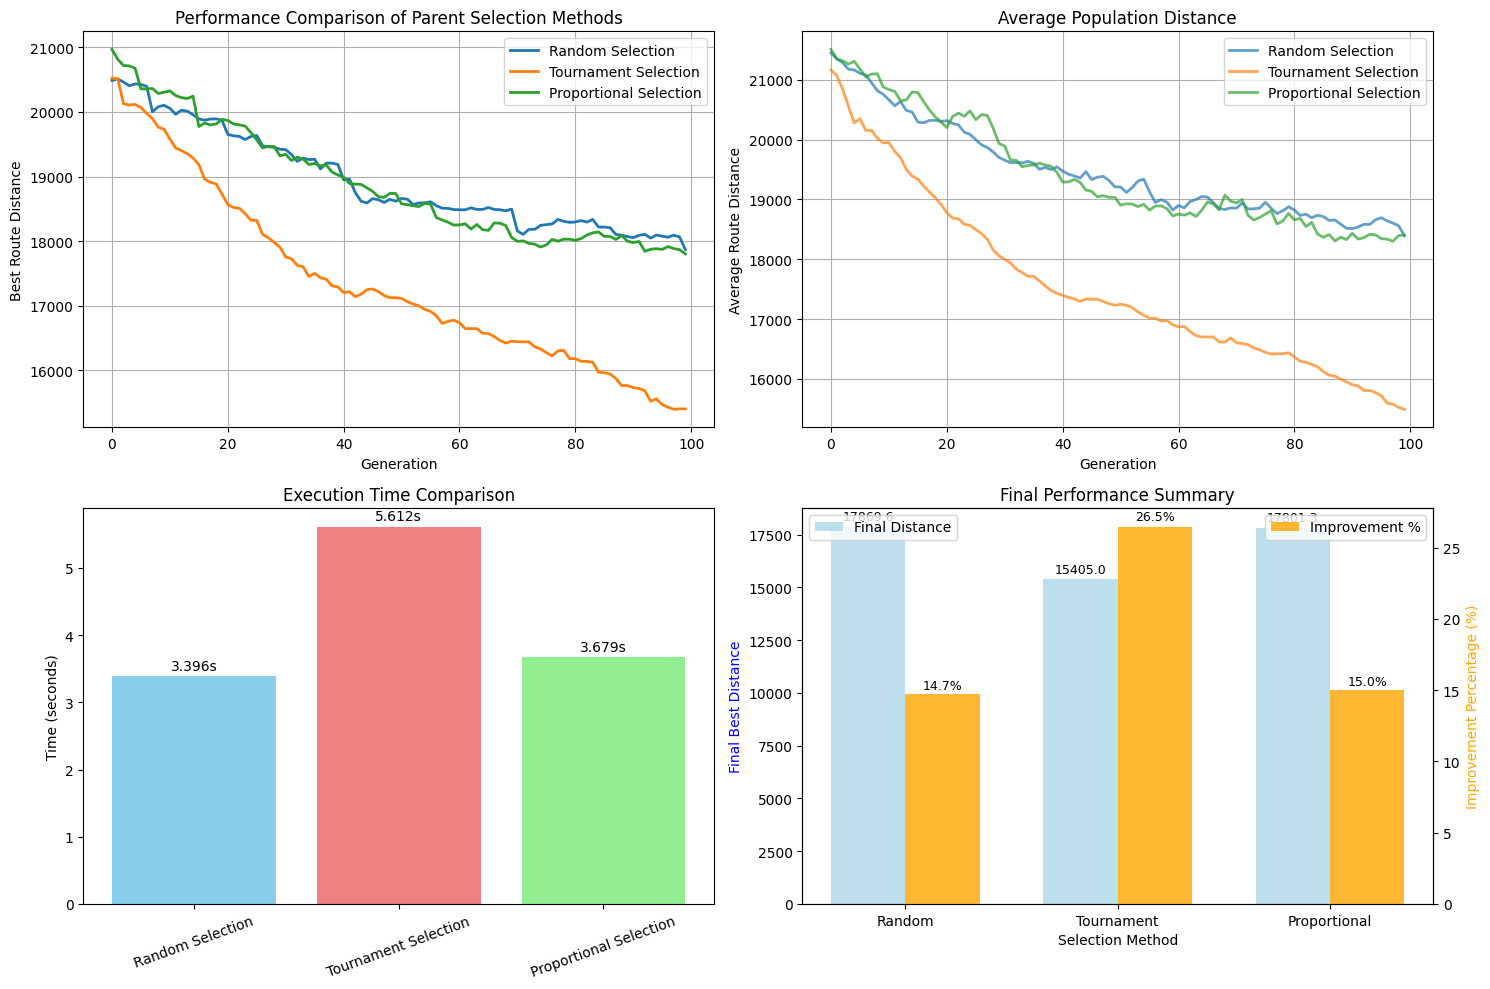

'\n============================================================'
'BENCHMARK SUMMARY'
'============================================================'
'Method               Time (s)   Final Dist   Improvement '
'------------------------------------------------------------'
'Random Selection     3.396      17869.63     14.7        %'
'Tournament Selection 5.612      15405.03     26.5        %'
'Proportional Selection 3.679      17801.33     15.0        %'
'============================================================'
'\n🏆 WINNERS:'
'Best Final Distance: Tournament Selection'
'Fastest Execution: Random Selection'
'Best Improvement: Tournament Selection'


In [ ]:
# Collect all results for easy access
all_results = [results_random, results_tournament, results_proportional]

# Create enhanced plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Best Distance Evolution (your original plot)
ax1.plot(results_random['min_distances'], label="Random Selection", linewidth=2)
ax1.plot(results_tournament['min_distances'], label="Tournament Selection", linewidth=2)
ax1.plot(results_proportional['min_distances'], label="Proportional Selection", linewidth=2)
ax1.set_title("Performance Comparison of Parent Selection Methods")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Best Route Distance")
ax1.legend()
ax1.grid(True)

# Plot 2: Average Distance Evolution
ax2.plot(results_random['avg_distances'], label="Random Selection", linewidth=2, alpha=0.7)
ax2.plot(results_tournament['avg_distances'], label="Tournament Selection", linewidth=2, alpha=0.7)
ax2.plot(results_proportional['avg_distances'], label="Proportional Selection", linewidth=2, alpha=0.7)
ax2.set_title("Average Population Distance")
ax2.set_xlabel("Generation")
ax2.set_ylabel("Average Route Distance")
ax2.legend()
ax2.grid(True)

# Plot 3: Execution Time Comparison
methods = [r['method_name'] for r in all_results]
times = [r['execution_time'] for r in all_results]
colors = ['skyblue', 'lightcoral', 'lightgreen']
bars = ax3.bar(methods, times, color=colors)
ax3.set_title("Execution Time Comparison")
ax3.set_ylabel("Time (seconds)")
ax3.tick_params(axis='x', rotation=20)

# Add time labels on bars
for bar, time_val in zip(bars, times):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{time_val:.3f}s', ha='center', va='bottom', fontsize=10)

# Plot 4: Performance Summary
final_distances = [r['final_distance'] for r in all_results]
improvements = [r['improvement_percentage'] for r in all_results]

x_pos = np.arange(len(methods))
width = 0.35

# Create dual y-axis
ax4_twin = ax4.twinx()

bars1 = ax4.bar(x_pos - width/2, final_distances, width, label='Final Distance', color='lightblue', alpha=0.8)
bars2 = ax4_twin.bar(x_pos + width/2, improvements, width, label='Improvement %', color='orange', alpha=0.8)

ax4.set_xlabel('Selection Method')
ax4.set_ylabel('Final Best Distance', color='blue')
ax4_twin.set_ylabel('Improvement Percentage (%)', color='orange')
ax4.set_title('Final Performance Summary')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([m.replace(' Selection', '') for m in methods])

# Add value labels
for bar, val in zip(bars1, final_distances):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{val:.1f}', ha='center', va='bottom', fontsize=9)

for bar, val in zip(bars2, improvements):
    height = bar.get_height()
    ax4_twin.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                  f'{val:.1f}%', ha='center', va='bottom', fontsize=9)

# Add legends
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Print benchmark summary
print("\n" + "="*60)
print("BENCHMARK SUMMARY")
print("="*60)
print(f"{'Method':<20} {'Time (s)':<10} {'Final Dist':<12} {'Improvement':<12}")
print("-"*60)

for result in all_results:
    print(f"{result['method_name']:<20} "
          f"{result['execution_time']:<10.3f} "
          f"{result['final_distance']:<12.2f} "
          f"{result['improvement_percentage']:<12.1f}%")

print("="*60)

# Determine winners
best_distance_method = min(all_results, key=lambda x: x['final_distance'])['method_name']
fastest_method = min(all_results, key=lambda x: x['execution_time'])['method_name']
best_improvement_method = max(all_results, key=lambda x: x['improvement_percentage'])['method_name']

print(f"\n WINNERS:")
print(f"Best Final Distance: {best_distance_method}")
print(f"Fastest Execution: {fastest_method}")
print(f"Best Improvement: {best_improvement_method}")

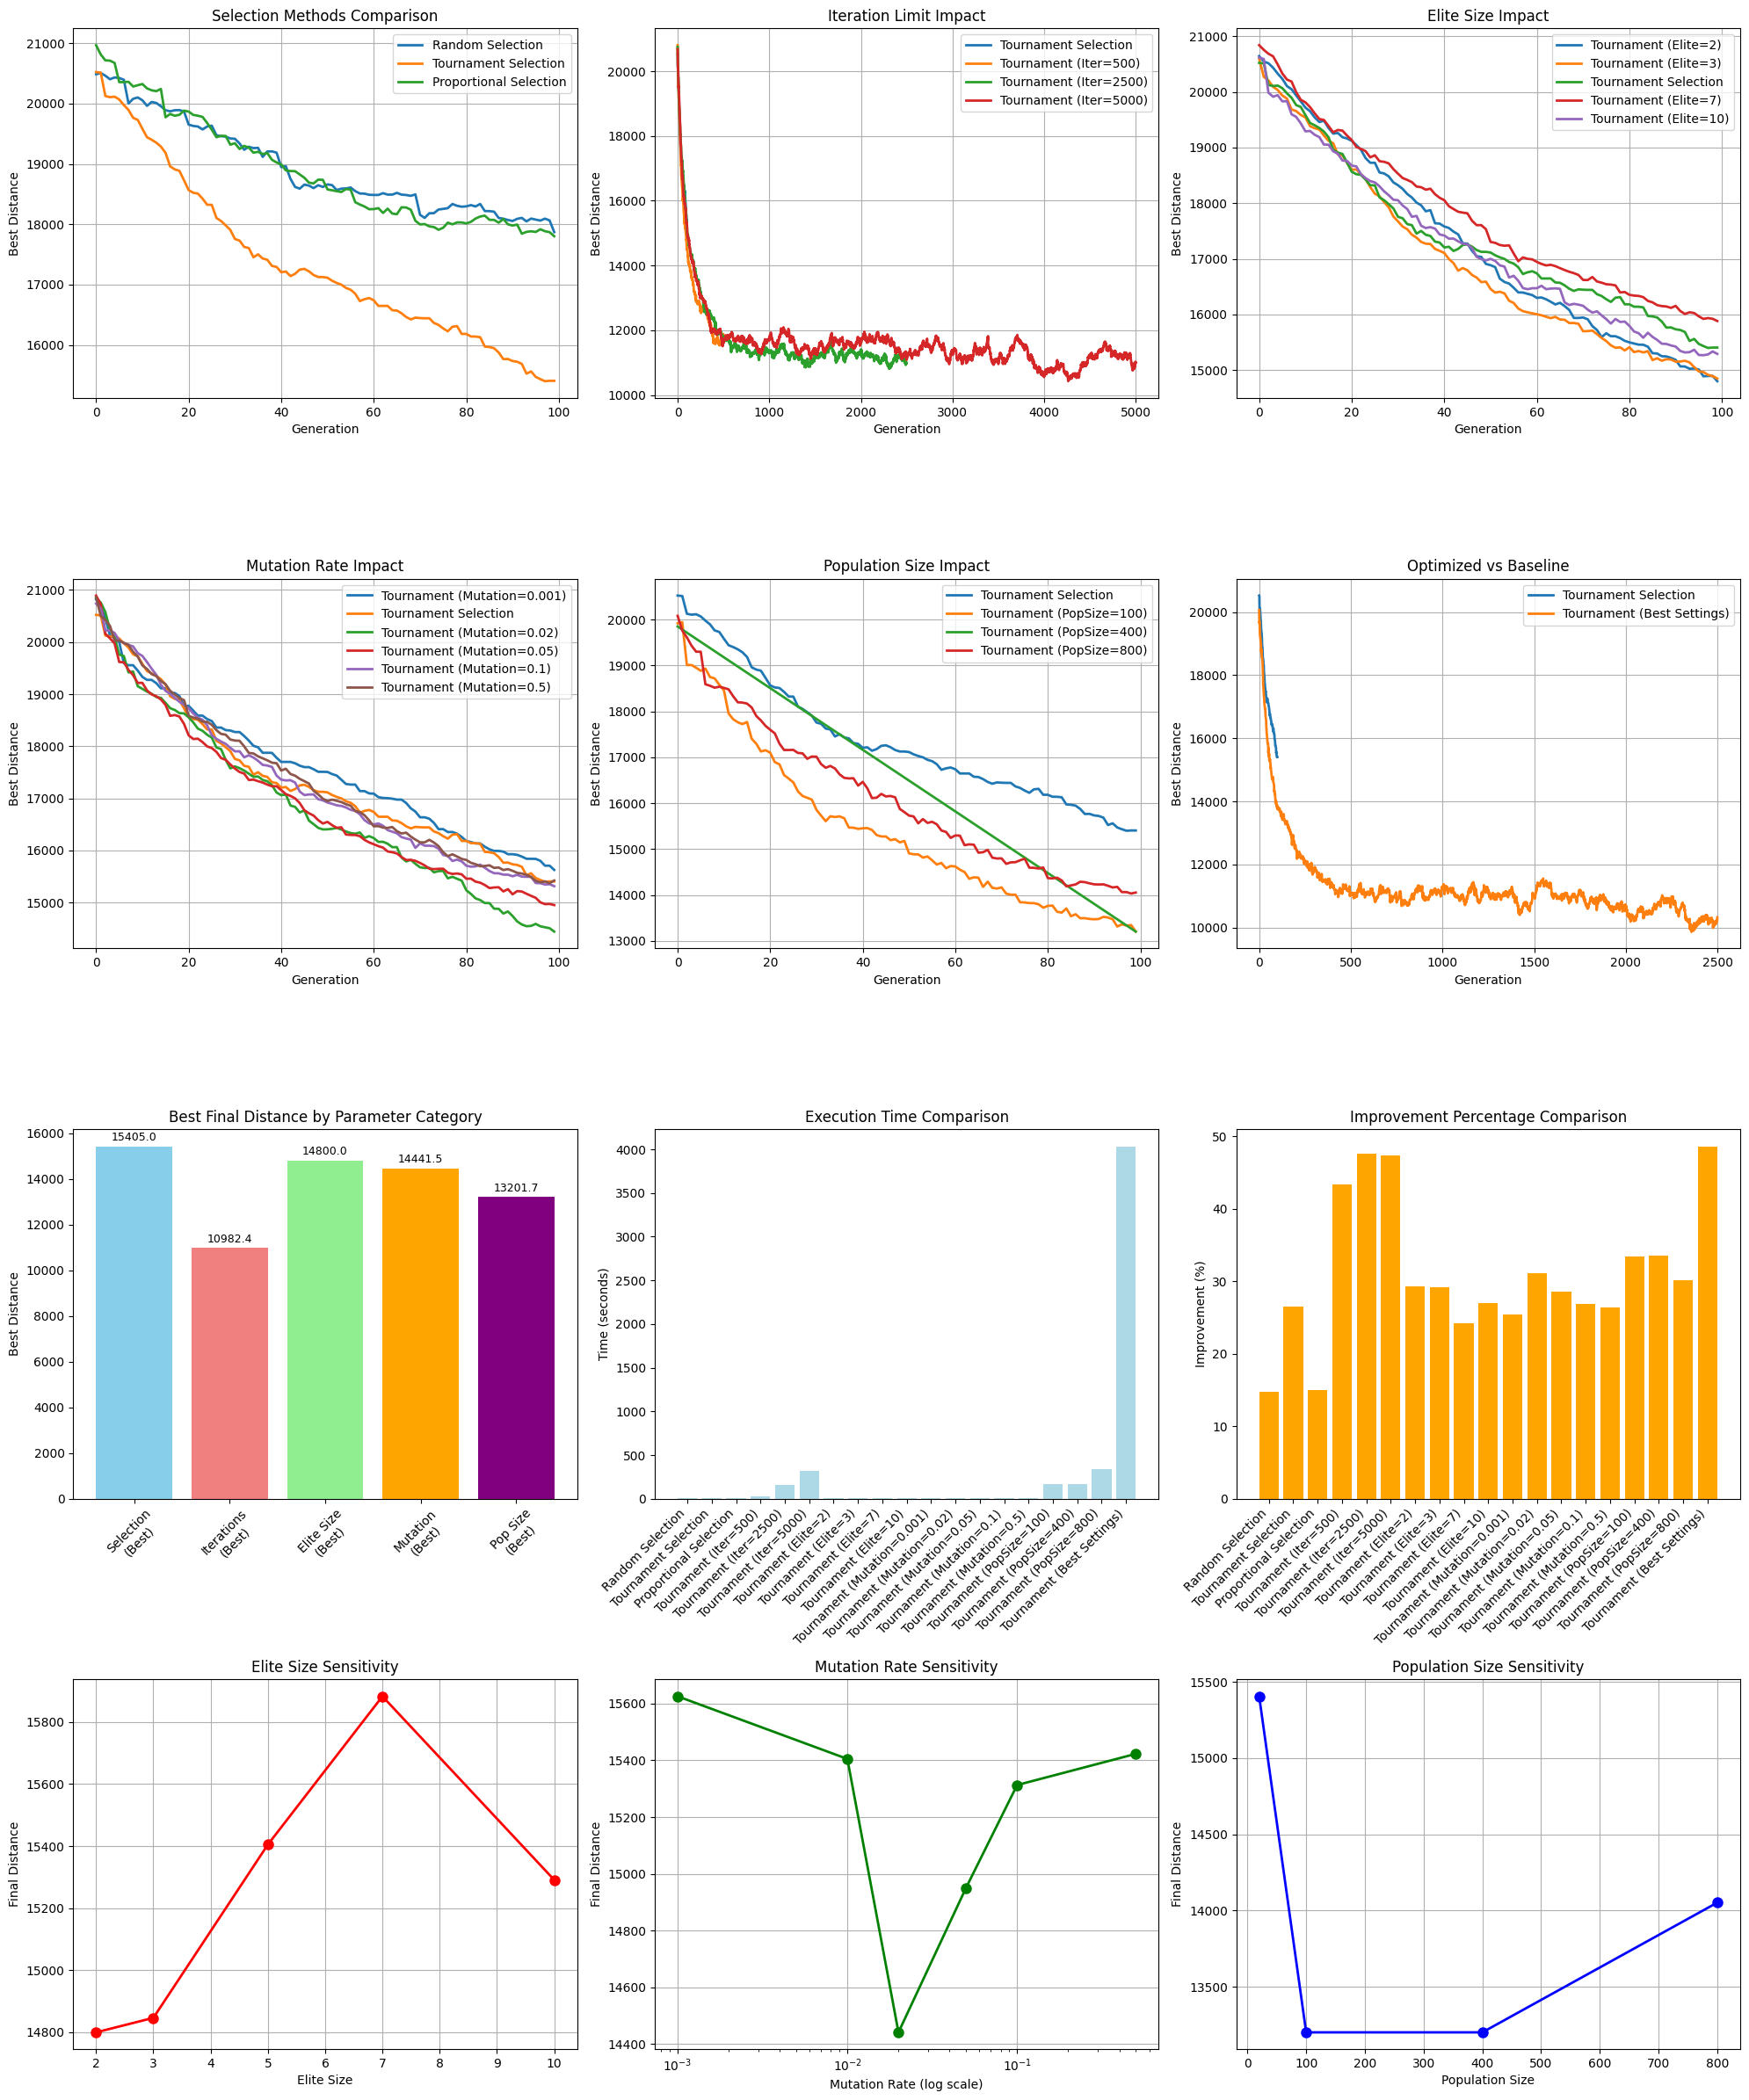

('\n'
 '====================================================================================================')
'COMPREHENSIVE BENCHMARK SUMMARY'
'===================================================================================================='
'\nSELECTION METHODS                                 '
'--------------------------------------------------'
'Method                         Time (s)   Final Dist   Improvement '
'Random Selection               3.396      17869.63     14.7        %'
'Tournament Selection           5.612      15405.03     26.5        %'
'Proportional Selection         3.679      17801.33     15.0        %'
'\nITERATION TESTING                                 '
'--------------------------------------------------'
'Method                         Time (s)   Final Dist   Improvement '
'Tournament Selection           5.612      15405.03     26.5        %'
'Tournament (Iter=500)          30.968     11871.41     43.3        %'
'Tournament (Iter=2500)         156.083  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

selection_results = [results_random, results_tournament, results_proportional]

# Parameter testing results organized by parameter type
iteration_results = [
    results_tournament,  # baseline (100 iterations)
    results_tournament_iteration500,
    results_tournament_iteration2500,
    results_tournament_iteration5000
]

elite_results = [
    results_tournament_eliteSize2,
    results_tournament_eliteSize3,
    results_tournament,  # baseline (elite=5)
    results_tournament_eliteSize7,
    results_tournament_eliteSize10
]

mutation_results = [
    results_tournament_mutationProbability0001,
    results_tournament,  # baseline (mutation=0.01)
    results_tournament_mutationProbability002,
    results_tournament_mutationProbability005,
    results_tournament_mutationProbability01,
    results_tournament_mutationProbability05
]

popsize_results = [
    results_tournament,  # baseline (popsize=20)
    results_tournament_popsize100,
    results_tournament_popsize400,
    results_tournament_popsize800
]

# Best configuration comparison
best_comparison = [
    results_tournament,  # baseline
    results_tournament_best_parameter
]

# Create comprehensive plotting
fig = plt.figure(figsize=(20, 24))

# Plot 1: Original Selection Method Comparison
ax1 = plt.subplot(4, 3, 1)
for result in selection_results:
    plt.plot(result['min_distances'], label=result['method_name'], linewidth=2)
plt.title("Selection Methods Comparison")
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)

# Plot 2: Iteration Limit Testing
ax2 = plt.subplot(4, 3, 2)
for result in iteration_results:
    plt.plot(result['min_distances'], label=result['method_name'], linewidth=2)
plt.title("Iteration Limit Impact")
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)

# Plot 3: Elite Size Testing
ax3 = plt.subplot(4, 3, 3)
for result in elite_results:
    plt.plot(result['min_distances'], label=result['method_name'], linewidth=2)
plt.title("Elite Size Impact")
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)

# Plot 4: Mutation Rate Testing
ax4 = plt.subplot(4, 3, 4)
for result in mutation_results:
    plt.plot(result['min_distances'], label=result['method_name'], linewidth=2)
plt.title("Mutation Rate Impact")
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)

# Plot 5: Population Size Testing
ax5 = plt.subplot(4, 3, 5)
for result in popsize_results:
    plt.plot(result['min_distances'], label=result['method_name'], linewidth=2)
plt.title("Population Size Impact")
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)

# Plot 6: Best Configuration Comparison
ax6 = plt.subplot(4, 3, 6)
for result in best_comparison:
    plt.plot(result['min_distances'], label=result['method_name'], linewidth=2)
plt.title("Optimized vs Baseline")
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)

# Plot 7: Final Distance Comparison by Parameter Type
ax7 = plt.subplot(4, 3, 7)
all_groups = [
    ("Selection", selection_results),
    ("Iterations", iteration_results),
    ("Elite Size", elite_results),
    ("Mutation", mutation_results),
    ("Pop Size", popsize_results)
]

group_names = []
final_distances = []
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'purple']

for i, (group_name, group_results) in enumerate(all_groups):
    best_in_group = min(group_results, key=lambda x: x['final_distance'])
    group_names.append(f"{group_name}\n(Best)")
    final_distances.append(best_in_group['final_distance'])

bars = plt.bar(group_names, final_distances, color=colors)
plt.title("Best Final Distance by Parameter Category")
plt.ylabel("Best Distance")
plt.xticks(rotation=45)

# Add value labels on bars
for bar, val in zip(bars, final_distances):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{val:.1f}', ha='center', va='bottom', fontsize=9)

# Plot 8: Execution Time Comparison
ax8 = plt.subplot(4, 3, 8)
all_results_flat = (selection_results + iteration_results + elite_results +
                   mutation_results + popsize_results + best_comparison)
# Remove duplicates by method name
unique_results = []
seen_names = set()
for result in all_results_flat:
    if result['method_name'] not in seen_names:
        unique_results.append(result)
        seen_names.add(result['method_name'])

methods = [r['method_name'] for r in unique_results]
times = [r['execution_time'] for r in unique_results]

plt.bar(range(len(methods)), times, color='lightblue')
plt.title("Execution Time Comparison")
plt.ylabel("Time (seconds)")
plt.xticks(range(len(methods)), methods, rotation=45, ha='right')

# Plot 9: Improvement Percentage Comparison
ax9 = plt.subplot(4, 3, 9)
improvements = [r['improvement_percentage'] for r in unique_results]
plt.bar(range(len(methods)), improvements, color='orange')
plt.title("Improvement Percentage Comparison")
plt.ylabel("Improvement (%)")
plt.xticks(range(len(methods)), methods, rotation=45, ha='right')

# Plot 10: Elite Size Sensitivity
ax10 = plt.subplot(4, 3, 10)
elite_sizes = [2, 3, 5, 7, 10]
elite_final_distances = [r['final_distance'] for r in elite_results]
plt.plot(elite_sizes, elite_final_distances, 'o-', linewidth=2, markersize=8, color='red')
plt.title("Elite Size Sensitivity")
plt.xlabel("Elite Size")
plt.ylabel("Final Distance")
plt.grid(True)

# Plot 11: Mutation Rate Sensitivity
ax11 = plt.subplot(4, 3, 11)
mutation_rates = [0.001, 0.01, 0.02, 0.05, 0.1, 0.5]
mutation_final_distances = [r['final_distance'] for r in mutation_results]
plt.semilogx(mutation_rates, mutation_final_distances, 'o-', linewidth=2, markersize=8, color='green')
plt.title("Mutation Rate Sensitivity")
plt.xlabel("Mutation Rate (log scale)")
plt.ylabel("Final Distance")
plt.grid(True)

# Plot 12: Population Size Sensitivity
ax12 = plt.subplot(4, 3, 12)
pop_sizes = [20, 100, 400, 800]
pop_final_distances = [r['final_distance'] for r in popsize_results]
plt.plot(pop_sizes, pop_final_distances, 'o-', linewidth=2, markersize=8, color='blue')
plt.title("Population Size Sensitivity")
plt.xlabel("Population Size")
plt.ylabel("Final Distance")
plt.grid(True)

plt.tight_layout()
plt.show()

# Store the original print function to avoid conflicts
original_print = print

# Print comprehensive benchmark summary
original_print("\n" + "="*100)
original_print("COMPREHENSIVE BENCHMARK SUMMARY")
original_print("="*100)

original_print(f"\n{'SELECTION METHODS':<50}")
original_print("-"*50)
original_print(f"{'Method':<30} {'Time (s)':<10} {'Final Dist':<12} {'Improvement':<12}")
for result in selection_results:
    original_print(f"{result['method_name']:<30} "
          f"{result['execution_time']:<10.3f} "
          f"{result['final_distance']:<12.2f} "
          f"{result['improvement_percentage']:<12.1f}%")

original_print(f"\n{'ITERATION TESTING':<50}")
original_print("-"*50)
original_print(f"{'Method':<30} {'Time (s)':<10} {'Final Dist':<12} {'Improvement':<12}")
for result in iteration_results:
    original_print(f"{result['method_name']:<30} "
          f"{result['execution_time']:<10.3f} "
          f"{result['final_distance']:<12.2f} "
          f"{result['improvement_percentage']:<12.1f}%")

original_print(f"\n{'ELITE SIZE TESTING':<50}")
original_print("-"*50)
original_print(f"{'Method':<30} {'Time (s)':<10} {'Final Dist':<12} {'Improvement':<12}")
for result in elite_results:
    original_print(f"{result['method_name']:<30} "
          f"{result['execution_time']:<10.3f} "
          f"{result['final_distance']:<12.2f} "
          f"{result['improvement_percentage']:<12.1f}%")

original_print(f"\n{'MUTATION RATE TESTING':<50}")
original_print("-"*50)
original_print(f"{'Method':<30} {'Time (s)':<10} {'Final Dist':<12} {'Improvement':<12}")
for result in mutation_results:
    original_print(f"{result['method_name']:<30} "
          f"{result['execution_time']:<10.3f} "
          f"{result['final_distance']:<12.2f} "
          f"{result['improvement_percentage']:<12.1f}%")

original_print(f"\n{'POPULATION SIZE TESTING':<50}")
original_print("-"*50)
original_print(f"{'Method':<30} {'Time (s)':<10} {'Final Dist':<12} {'Improvement':<12}")
for result in popsize_results:
    original_print(f"{result['method_name']:<30} "
          f"{result['execution_time']:<10.3f} "
          f"{result['final_distance']:<12.2f} "
          f"{result['improvement_percentage']:<12.1f}%")

original_print("="*100)

# Find overall winners
all_results_for_comparison = unique_results
best_overall = min(all_results_for_comparison, key=lambda x: x['final_distance'])
fastest_overall = min(all_results_for_comparison, key=lambda x: x['execution_time'])
best_improvement_overall = max(all_results_for_comparison, key=lambda x: x['improvement_percentage'])

original_print(f"\n OVERALL WINNERS:")
original_print(f"Best Final Distance: {best_overall['method_name']} ({best_overall['final_distance']:.2f})")
original_print(f"Fastest Execution: {fastest_overall['method_name']} ({fastest_overall['execution_time']:.3f}s)")
original_print(f"Best Improvement: {best_improvement_overall['method_name']} ({best_improvement_overall['improvement_percentage']:.1f}%)")

# Parameter recommendations
original_print(f"\n PARAMETER RECOMMENDATIONS:")
best_elite = min(elite_results, key=lambda x: x['final_distance'])
best_mutation = min(mutation_results, key=lambda x: x['final_distance'])
best_popsize = min(popsize_results, key=lambda x: x['final_distance'])
best_iteration = min(iteration_results, key=lambda x: x['final_distance'])

original_print(f"Best Elite Size: {best_elite['method_name']}")
original_print(f"Best Mutation Rate: {best_mutation['method_name']}")
original_print(f"Best Population Size: {best_popsize['method_name']}")
original_print(f"Best Iteration Count: {best_iteration['method_name']}")

# Additional analysis: Find optimal parameter combinations
original_print(f"\n DETAILED PARAMETER ANALYSIS:")
original_print("-"*60)

# Elite size analysis
elite_analysis = [(r['method_name'], r['final_distance']) for r in elite_results]
elite_analysis.sort(key=lambda x: x[1])
original_print("Elite Size Ranking (Best to Worst):")
for i, (name, distance) in enumerate(elite_analysis):
    original_print(f"  {i+1}. {name}: {distance:.2f}")

original_print("")  # Empty line

# Mutation rate analysis
mutation_analysis = [(r['method_name'], r['final_distance']) for r in mutation_results]
mutation_analysis.sort(key=lambda x: x[1])
original_print("Mutation Rate Ranking (Best to Worst):")
for i, (name, distance) in enumerate(mutation_analysis):
    original_print(f"  {i+1}. {name}: {distance:.2f}")

original_print("")  # Empty line

# Population size analysis
popsize_analysis = [(r['method_name'], r['final_distance']) for r in popsize_results]
popsize_analysis.sort(key=lambda x: x[1])
original_print("Population Size Ranking (Best to Worst):")
for i, (name, distance) in enumerate(popsize_analysis):
    original_print(f"  {i+1}. {name}: {distance:.2f}")

original_print("")  # Empty line

# Time vs Performance trade-off analysis
original_print(" TIME vs PERFORMANCE TRADE-OFF:")
original_print("-"*60)
time_performance = [(r['method_name'], r['execution_time'], r['final_distance']) for r in unique_results]
time_performance.sort(key=lambda x: x[2])  # Sort by performance

original_print("Best Performance (regardless of time):")
for i, (name, time, distance) in enumerate(time_performance[:5]):
    original_print(f"  {i+1}. {name}: {distance:.2f} (Time: {time:.3f}s)")

original_print("")  # Empty line

time_performance.sort(key=lambda x: x[1])  # Sort by time
original_print("Fastest Execution (regardless of performance):")
for i, (name, time, distance) in enumerate(time_performance[:5]):
    original_print(f"  {i+1}. {name}: {time:.3f}s (Distance: {distance:.2f})")